In [10]:
import pruned_model
import transformer_model
import torch
from torch.optim.lr_scheduler import CosineAnnealingLR
import utils
import train
import prunning
import torch_pruning as tp
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
if torch.cuda.is_available():
    print("running on gpu")
    torch.cuda.empty_cache()
    torch.cuda.ipc_collect()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device('cpu')
max_iters = 500
eval_interval = 500
learning_rate_start = 2e-3
learning_rate_end = 1e-4
batch_size = 10

running on gpu


354 parameters
epoch=0, loss=3.059187650680542, accuracy=0.3796880841255188
epoch=1, loss=0.021724821999669075, accuracy=0.9996286630630493


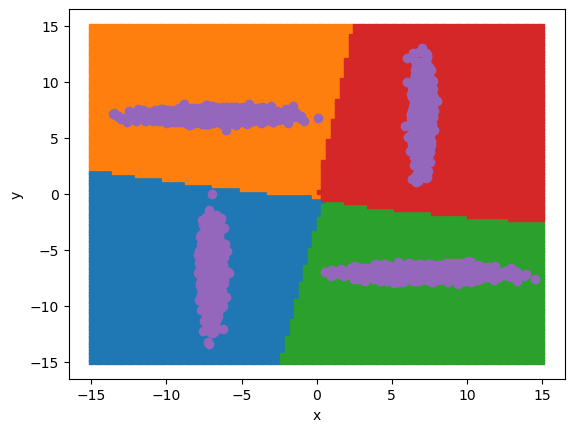

In [15]:
prunner = transformer_model.FullTransformer(block_size=100)
pruned = pruned_model.NeuralNet()
prunner, pruned = prunner.to(device), pruned.to(device)
pruned.init()

In [17]:
DG = tp.DependencyGraph()
prunning.do_pruning('l1',
 pruned,
 sensitivity=0.01,
 acc_before=0.98,
 DG=DG,
 indx=[1],
 dataloader=pruned_model.dataloader,
 train_until_acc= pruned.train_until_acc,
 evaluateAccuracy=pruned_model.evaluateAccuracy
  )

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

DEBUG:root:calling estimate
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0.33499999999999996
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfon

KeyboardInterrupt: 

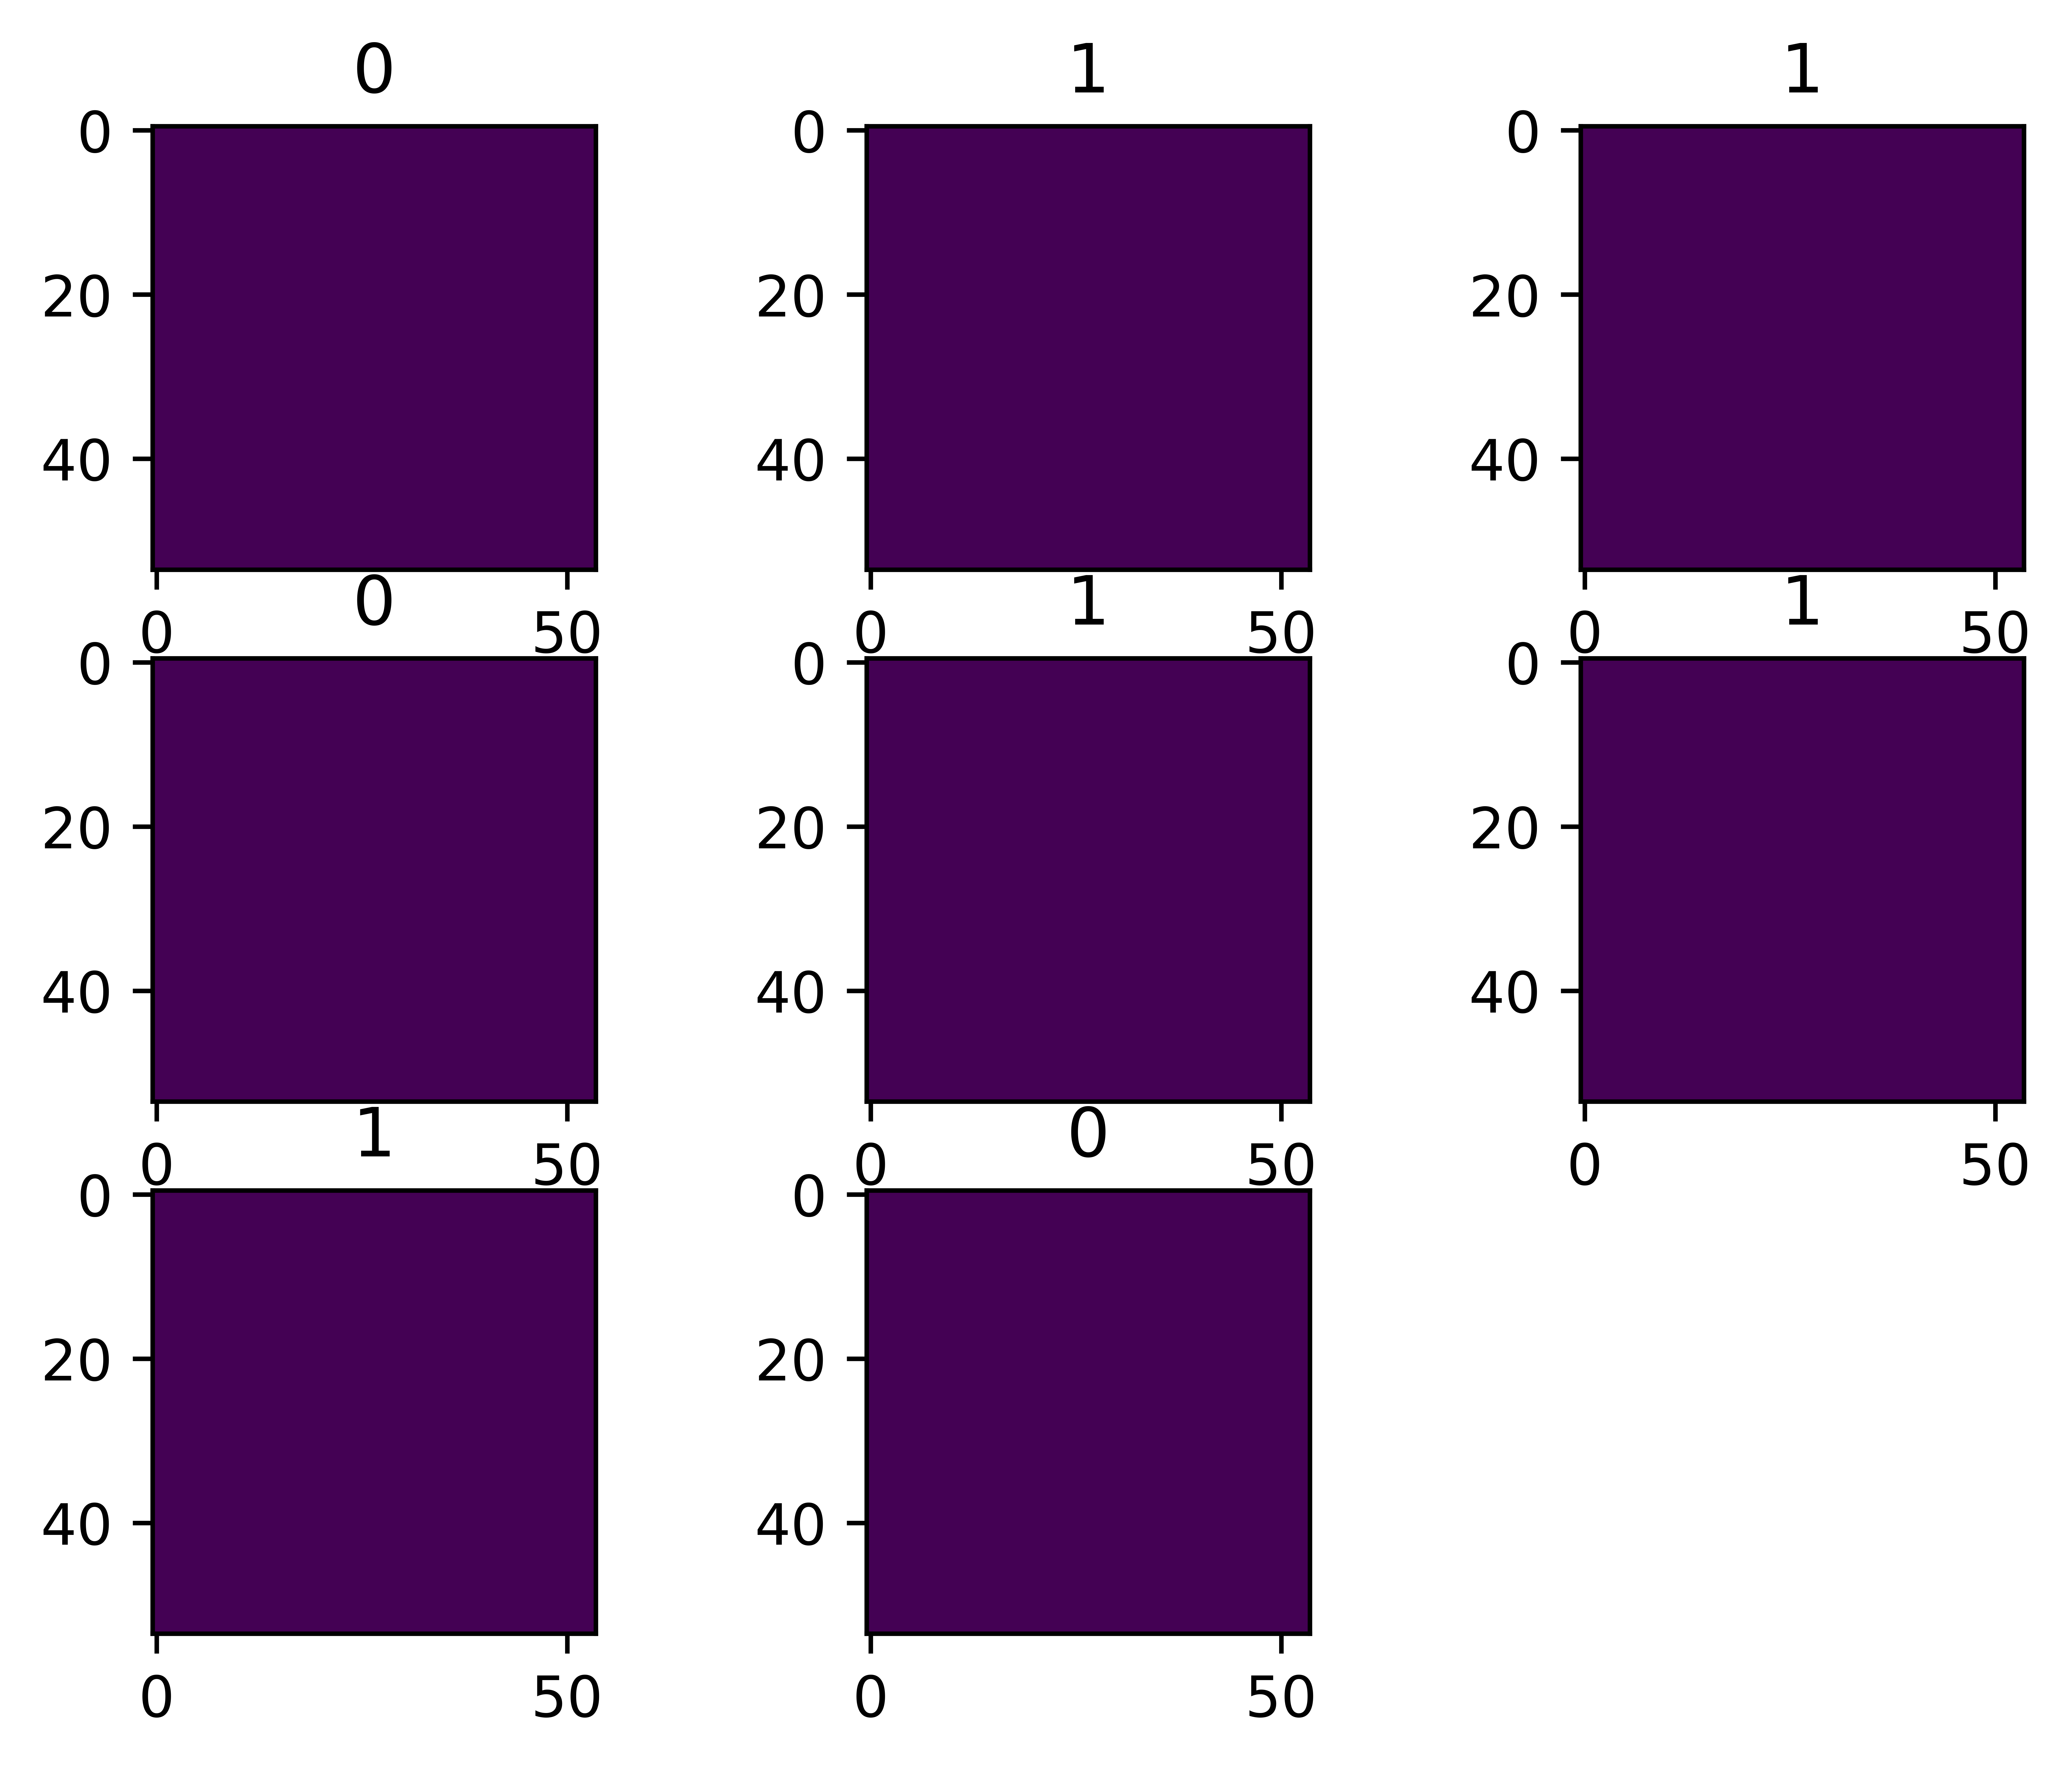

In [4]:
train.train_transformer_on_another_model(pruned=pruned, prunner=prunner)

In [ ]:
utils.plot_transformer(transf=prunner, gen=pruned.get_batch("train", batch_size=1))